# PyTorch Fundamentals

Resource notebook: [learnpytorch.io](https://www.learnpytorch.io/)

Question Forum: [Github-Discussion](https://github.com/mrdbourke/pytorch-deep-learning/discussions)

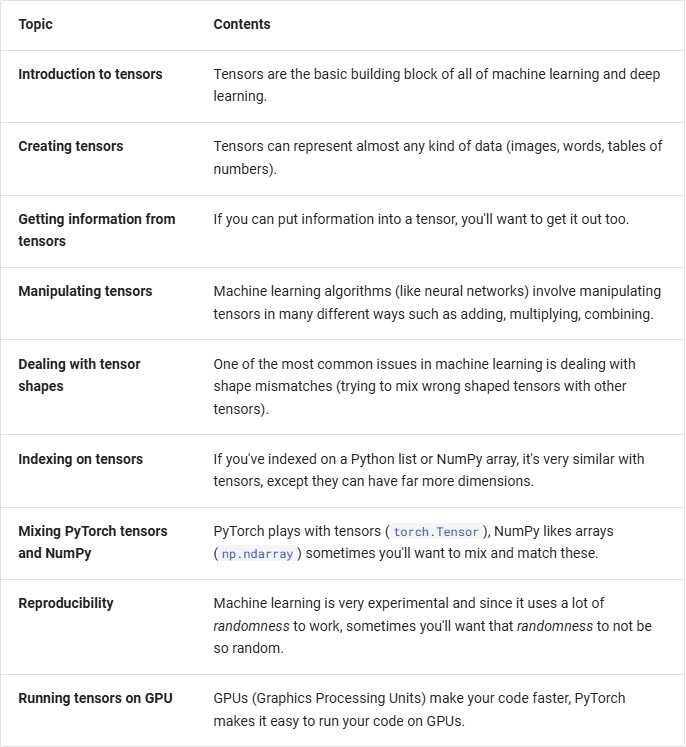

In [2]:
# 导入PyTorch
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
print(torch.__version__)

2.1.2+cpu


## 介绍tensor
tensors是机器学习中的基础构成部分，实现数据的数字化表示。举个例子，我们可以用一个形状为`[3,224,224]`的tensor表示一张图片，对应的是`[color_channels, height, width]`，红绿蓝三通道的宽高为224的图片

### 创建tensor
在PyTorch中对应的是`torch.Tensor`类，[torch.Tensor](https://pytorch.org/docs/stable/tensors.html)

HomeWork 1：认真阅读该文档至少10分钟

**创建一个scalar tensor**

标量就是一个数字，即一个0维向量

In [2]:
scalar = torch.tensor(7)
scalar

tensor(7)

**查看tensor的维度**

使用`ndim`属性

In [3]:
scalar.ndim

0

获得scalar tensor的数字

In [4]:
scalar.item()

7

`vector`类型数据

维度为1的tensor

In [5]:
vector = torch.tensor([7,7])
vector

tensor([7, 7])

In [6]:
vector.ndim

1

**如何理解tensor的维度数目**

打印出该tensor，数该tensor中的`[`数目

**tensor的shape属性**

tensor的`shape`属性表示该tensor中元素的排布方式

In [7]:
vector.shape

torch.Size([2])

`matrix`类型的数据

维度为2的tensor

In [8]:
MATRIX = torch.tensor([[7,8],
                       [9,10]])
MATRIX

tensor([[ 7,  8],
        [ 9, 10]])

In [9]:
MATRIX.ndim

2

In [10]:
MATRIX.shape

torch.Size([2, 2])

In [11]:
TENSOR = torch.tensor([[[1,2,7],
                        [3,4,8],
                        [5,6,9]]])
TENSOR

tensor([[[1, 2, 7],
         [3, 4, 8],
         [5, 6, 9]]])

In [12]:
TENSOR.ndim

3

In [13]:
TENSOR.shape

torch.Size([1, 3, 3])

**关于tensor的维度和表示**

shape指的是每个ndim维度上有几个元素

如下图所示，这是一个tensor，其中第一维度为1表示最外层`[]`中仅有一个元素；第二维度为3表示从外往里数第二个`[]`中有3个元素；第三维度为3表示最里层`[]`中有3个元素

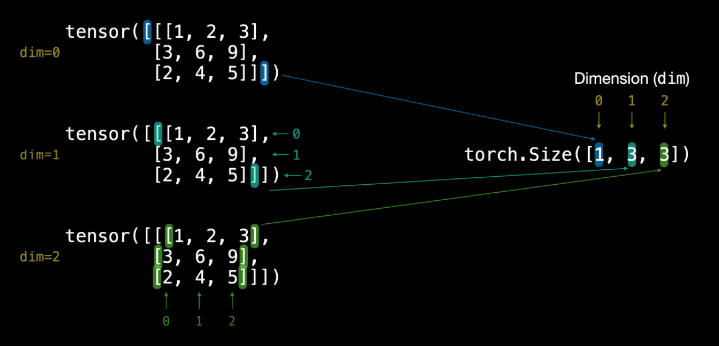

### 创建随机tensor
从机器学习的本质来说，`Start with random numbers -> look at data -> update random numbers -> look at data -> update random numbers...`

我们通常需要对模型中的weights做初始化，这里就需要用到随机tensor了

随机tensor的创建通常是使用`torch.rand()`，并同时使用`size`参数设定目标tensor的形状

In [14]:
random_tensor = torch.rand(size=(3,4))
random_tensor, random_tensor.dtype

(tensor([[0.1665, 0.0706, 0.6304, 0.5183],
         [0.3473, 0.5621, 0.9112, 0.4287],
         [0.0545, 0.1814, 0.1403, 0.6862]]),
 torch.float32)

In [15]:
random_image_size_tensor = torch.rand(size=(224, 224, 3))
random_image_size_tensor, random_image_size_tensor.ndim

(tensor([[[0.4364, 0.8684, 0.6706],
          [0.1919, 0.9520, 0.7228],
          [0.3783, 0.0080, 0.7991],
          ...,
          [0.8033, 0.4994, 0.2980],
          [0.8204, 0.5876, 0.1092],
          [0.7603, 0.5831, 0.1766]],
 
         [[0.7716, 0.0713, 0.5145],
          [0.3250, 0.2409, 0.1406],
          [0.5183, 0.8819, 0.2673],
          ...,
          [0.6164, 0.8570, 0.2709],
          [0.3514, 0.5382, 0.3413],
          [0.3248, 0.8576, 0.6761]],
 
         [[0.0363, 0.2681, 0.3956],
          [0.5075, 0.3083, 0.5245],
          [0.7694, 0.4661, 0.7230],
          ...,
          [0.8227, 0.7842, 0.0319],
          [0.1900, 0.5209, 0.4117],
          [0.3894, 0.1993, 0.5466]],
 
         ...,
 
         [[0.0989, 0.0020, 0.2309],
          [0.8182, 0.8914, 0.8978],
          [0.4832, 0.3065, 0.6732],
          ...,
          [0.3884, 0.0771, 0.5239],
          [0.7319, 0.3580, 0.2143],
          [0.3738, 0.5513, 0.5894]],
 
         [[0.3256, 0.1398, 0.0767],
          [0

**使用zeros和ones创建全0的tensor和全1的tensor**

通常是用在掩码操作中

`torch.zeros()`和`torch.ones()`

使用`size`参数设定tensor的形状

In [3]:
zeros = torch.zeros(size=(3,4))
zeros, zeros.dtype

(tensor([[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]),
 torch.float32)

In [4]:
ones = torch.ones(size=(3,5))
ones, ones.dtype

(tensor([[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]]),
 torch.float32)

In [5]:
# 所有元素值在一个范围中的张量
# 使用 torch.arange(start, end, step) 函数
zero_to_ten = torch.arange(0, 10, 1)
zero_to_ten

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [7]:
# 和另一个tensor形状相同的全0或全1的tensor
ten_zeros = torch.zeros_like(zero_to_ten)
ten_zeros, ten_zeros.ndim, ten_zeros.dtype, ten_zeros.shape

(tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 1, torch.int64, torch.Size([10]))

In [9]:
# tensor的dtype属性，默认为float32和int64，tensor的dtype和数值计算的精度密切相关
float_32_tensor = torch.tensor([1.0, 2, 3, 4],
                               dtype=None, 
                               device=None,
                               requires_grad=False)
float_32_tensor, float_32_tensor.dtype, float_32_tensor.device

(tensor([1., 2., 3., 4.]), torch.float32, device(type='cpu'))

In [10]:
# 使用Pytorch的过程中经常遇到的issue包括tensor的shape不match，datatype 不匹配的issue和device 不匹配的issue
float_16_tensor = torch.tensor([1.0, 2, 3, 4],
                               dtype=torch.float16)
float_16_tensor, float_16_tensor.dtype

(tensor([1., 2., 3., 4.], dtype=torch.float16), torch.float16)

In [11]:
# 从tensor中获取信息
# 其中最重要的信息包括`shape`, `dtype`, `device`
# 遇到报错的时候，首先就来查看代码中tensor的这三个属性
some_tensor = torch.rand(3, 4)

some_tensor, some_tensor.shape, some_tensor.dtype, some_tensor.device

(tensor([[0.5829, 0.7764, 0.8860, 0.1262],
         [0.6770, 0.2570, 0.9798, 0.7243],
         [0.6000, 0.6601, 0.1062, 0.7258]]),
 torch.Size([3, 4]),
 torch.float32,
 device(type='cpu'))

In [12]:
# 操作tensor
# 在DL中，所有数据都被表示成tensor，一个模型会在输入tensor上进行一系列操作以获取特征表示
# 所有操作都是由`addition`, `substraction`, `multiplication`,  `division`, `matrix multiplication`组合而成

# 基本操作
tensor = torch.tensor([1, 2, 3])
tensor + 10

tensor([11, 12, 13])

In [13]:
tensor * 10

tensor([10, 20, 30])

In [14]:
# 上面两个操作都没有改变tensor变量本身
tensor

tensor([1, 2, 3])

In [15]:
tensor = tensor - 10
tensor

tensor([-9, -8, -7])

In [16]:
tensor += 10
tensor

tensor([1, 2, 3])

In [20]:
# 使用pytorch的内置函数来完成`+`, `-`, `*`基本操作
# 如`torch.mul()`和`torch.add()`
torch.mul(tensor, 10), torch.add(tensor, 10)

(tensor([10, 20, 30]), tensor([11, 12, 13]))

In [21]:
tensor

tensor([1, 2, 3])

In [22]:
# 逐元素乘法
tensor * tensor, torch.mul(tensor, tensor)

(tensor([1, 4, 9]), tensor([1, 4, 9]))

In [23]:
# 矩阵乘法（@），重中之重！！！
# 关于矩阵乘法的维度变换：要求两个tensor的内部维度相同，结果tensor的维度为两个tensor的外部维度组合
tensor = torch.tensor([1, 2, 3])
tensor.shape

torch.Size([3])

In [25]:
tensor * tensor, torch.matmul(tensor, tensor), tensor @ tensor

(tensor([1, 4, 9]), tensor(14), tensor(14))

In [5]:
# 观察手动实现的matmul和pytorch的matmul在时间效率上的差异
import torch

tensor = torch.tensor([1, 2, 3])
import time

start_time = time.time()
value = 0
for i in range(len(tensor)):
    value += tensor[i] * tensor[i]
end_time = time.time()

value, end_time - start_time 


(tensor(14), 0.0013041496276855469)

In [6]:
import time 
start_time = time.time()

value = torch.matmul(tensor, tensor)

end_time = time.time()

value, end_time - start_time

(tensor(14), 0.0)

In [3]:
# 关于pytorch中两个tensor的shape不匹配的error
# tensor的转置
import torch

tensor_A = torch.rand(size=(4, 2))
tensor_B = torch.rand(size=(4, 2))

tensor_A, tensor_B.T, torch.matmul(tensor_B, tensor_A.T)


(tensor([[0.7895, 0.3165],
         [0.9005, 0.0565],
         [0.4041, 0.1194],
         [0.6818, 0.7890]]),
 tensor([[0.9744, 0.9619, 0.1326, 0.9082],
         [0.0858, 0.0916, 0.1584, 0.6591]]),
 tensor([[0.7964, 0.8823, 0.4040, 0.7321],
         [0.7884, 0.8713, 0.3996, 0.7281],
         [0.1549, 0.1284, 0.0725, 0.2154],
         [0.9256, 0.8551, 0.4457, 1.1393]]))

In [4]:
# torch.mm()是torch.matmul()的缩写，矩阵乘法也被称为dot product 点乘
torch.mm(tensor_A.T, tensor_B)

tensor([[2.3083, 0.6636],
        [1.0952, 0.5713]])

## 矩阵乘法的重要性
深度学习的神经网络中处处都是矩阵乘法

举个例子，最简单的前馈神经网络（全连接层）`torch.nn.Linear()`实现的就是输入tensor`x`和权重矩阵`A`之间的点积计算

$y = x \cdot A^T + b$

In [9]:
# 从线性层开始学习
# 设置torch的随机数种子固定线性层的初始参数，使得结果可复现
torch.manual_seed(42)
linear = torch.nn.Linear(in_features=3, 
                         out_features=6)
x = torch.rand(4,3)
output = linear(x)
x.shape, output.shape, output

(torch.Size([4, 3]),
 torch.Size([4, 6]),
 tensor([[-0.1424,  0.2107, -0.0216,  0.0617, -0.0686,  0.5250],
         [ 0.0799,  0.1844, -0.1334,  0.1231, -0.1050,  0.6108],
         [ 0.0667,  0.7455, -0.0570, -0.3372,  0.4239,  0.4145],
         [ 0.0403,  0.5080,  0.0963, -0.0579,  0.2659,  0.5548]],
        grad_fn=<AddmmBackward0>))

In [12]:
# 矩阵中元素的聚合操作
# min, max, mean, sum
# 需要注意的是，`tensor.mean()`要求tensor中元素的dtype为float
x = torch.arange(0, 100, 10)
x.min(), x.max(), x.type(torch.float32).mean(), x.sum()


(tensor(0), tensor(90), tensor(45.), tensor(450))

In [13]:
# 使用torch内置函数来完成聚合操作
torch.min(x), torch.max(x), torch.mean(x.type(torch.float32)), torch.sum(x)

(tensor(0), tensor(90), tensor(45.), tensor(450))

In [15]:
# 获得tensor中最大元素/最小元素的索引
# 使用 `torch.argmax`和 `torch.argmin`
x.argmin().item(), x.argmax().item()

(0, 9)

In [18]:
# 改变tensor的datatype
# 使用`torch.Tensor.type(dtype=None)`函数
tensor = torch.tensor([10., 100., 10.])

tensor_float16 = tensor.type(torch.float16)

tensor.dtype, tensor_float16.dtype

(torch.float32, torch.float16)

## HomeWork 2
查看`torch.Tensor`类对应的document 至少10分钟，看到一些觉得重要的方法，code by yourself

In [1]:
# reshape, stacking, squeezing, unsequeezing方法的使用
# 非原地操作的改变tensor形状
# `torch.reshape(input, shape)`, `Tensor.view(shape)`, `torch.stack(tensors, dim=0)`, `torch.squeeze(input)`, `torch.unsqueeze(input, dim)`, `torch.permute(input, dims)`
# 这些方法都是用来保证神经网络中矩阵乘法运算时的形状匹配
import torch
x = torch.arange(1., 8.)
x, x.shape

(tensor([1., 2., 3., 4., 5., 6., 7.]), torch.Size([7]))

In [2]:
# add an additional dimension
x_reshaped = x.reshape(1, 7)
x_reshaped, x_reshaped.shape

(tensor([[1., 2., 3., 4., 5., 6., 7.]]), torch.Size([1, 7]))

In [3]:
# view方法，改变view，保存同样的数据
z = x.view(1, 7)
z, z.shape

(tensor([[1., 2., 3., 4., 5., 6., 7.]]), torch.Size([1, 7]))

In [4]:
# 通过view得到的tensor和原来的tensor是相同的数据存储，因而view后得到的变量改变后原来的tensor数据也会发生同样的改变
z[:, 0] = 5
z, x

(tensor([[5., 2., 3., 4., 5., 6., 7.]]), tensor([5., 2., 3., 4., 5., 6., 7.]))

In [ ]:
# 使用stack方法将tensor进行堆叠
x_stacked = torch.stack((x, x, x, x), dim=0) # dim=0代表list/tuple中每个元素作为out tensor的一个行tensor
x_stacked, x_stacked.shape

AttributeError: 'Tensor' object has no attribute 'stack'

In [7]:
x_stacked = torch.stack([x, x, x, x], dim=1) # dim=1代表list/tuple中每个元素作为out tensor的一个列tensor
x_stacked, x_stacked.shape

(tensor([[5., 5., 5., 5.],
         [2., 2., 2., 2.],
         [3., 3., 3., 3.],
         [4., 4., 4., 4.],
         [5., 5., 5., 5.],
         [6., 6., 6., 6.],
         [7., 7., 7., 7.]]),
 torch.Size([7, 4]))

In [9]:
# 使用`torch.Tensor.squeeze()`将tensor中所有1维`[`，压缩tensor，仅保留大于1的维度 也可以是`torch.Tensor.squeeze()`
x_squeezed = torch.squeeze(x_reshaped)
x_reshaped.shape, x_squeezed.shape


(torch.Size([1, 7]), torch.Size([7]))

In [11]:
# 使用`torch.unsqueeze()`方法给tensor在特定索引上加上一个维度 也可以是`torch.Tensor.unsqueeze()`
x_unsqueezed = torch.unsqueeze(x_squeezed, dim=0)
x_unsqueezed.shape, x_squeezed.shape

(torch.Size([1, 7]), torch.Size([7]))

In [13]:
# 使用`torch.Tensor.permute(input, dims)`重新排列tensor中各个维度的顺序，返回的是一个view，output tensor保持和input tensor有相同存储
x_original = torch.rand(size=(224, 224, 3))

x_permuted = x_original.permute(2, 0, 1)

x_original.shape, x_permuted.shape

(torch.Size([224, 224, 3]), torch.Size([3, 224, 224]))

In [14]:
# 索引，从tensor中获取特定的元素
x = torch.arange(1, 10).reshape(1, 3, 3)
x, x.shape

(tensor([[[1, 2, 3],
          [4, 5, 6],
          [7, 8, 9]]]),
 torch.Size([1, 3, 3]))

In [15]:
# 索引的逻辑是从外到内获取各个维度的特定元素
x[0], x[0][0], x[0][0][0]

(tensor([[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]),
 tensor([1, 2, 3]),
 tensor(1))

In [18]:
# 使用`,`隔开的多个维度进行索引，其中`:`代表获取该维度的全部元素
x[:, 0], x[0, 0], x[:, 0].shape, x[0, 0].shape

(tensor([[1, 2, 3]]), tensor([1, 2, 3]), torch.Size([1, 3]), torch.Size([3]))

In [19]:
x[:, :, 1]

tensor([[2, 5, 8]])

In [20]:
x[:, 1, 1]

tensor([5])

## PyTorch tensor和Numpy tensor之间的相关转换
`torch.from_numpy(ndarray)`实现将numpy数组转换为pytorch的tensor

`torch.Tensor.numpy()`实现将pytorch的tensor转换为numpy数组

In [ ]:
# numpy数组的dtype通常为`float64`，而pytorch通常使用`float32`进行计算，需要进行一次单独转换
import torch
import numpy as np

array = np.arange(1.0, 8.0)
tensor = torch.from_numpy(array)
array, tensor, tensor.type(torch.float32)

(array([1., 2., 3., 4., 5., 6., 7.]),
 tensor([1., 2., 3., 4., 5., 6., 7.], dtype=torch.float64),
 tensor([1., 2., 3., 4., 5., 6., 7.]))

In [23]:
# array和tensor是两部分内存，改变其中一个，另外一个不会受到影响
array += 1
array, tensor

(array([2., 3., 4., 5., 6., 7., 8.]),
 tensor([2., 3., 4., 5., 6., 7., 8.], dtype=torch.float64))

In [24]:
# 使用tensor.numpy()方法将tensor转换为numpy array
tensor = torch.ones(7)
numpy_tensor = tensor.numpy()
tensor, numpy_tensor

(tensor([1., 1., 1., 1., 1., 1., 1.]),
 array([1., 1., 1., 1., 1., 1., 1.], dtype=float32))

## 可复现性
使用固定的随机数种子让实验变得可复现

这个点对于实验很重要

In [25]:
import torch
random_tensor_A = torch.rand(3,4)
random_tensor_B = torch.rand(3,4)
random_tensor_A == random_tensor_B

tensor([[False, False, False, False],
        [False, False, False, False],
        [False, False, False, False]])

In [26]:
# 使用`torch.manual_seed(seed)`方法控制每次随机数的生成
import random
RANDOM_SEED = 42
torch.manual_seed(RANDOM_SEED)
random_tensor_C = torch.rand(3,4)

# 每次调用rand()之前都需要设定一次随机数种子
torch.manual_seed(RANDOM_SEED)
random_tensor_D = torch.rand(3,4)

random_tensor_C == random_tensor_D

tensor([[True, True, True, True],
        [True, True, True, True],
        [True, True, True, True]])

In [27]:
# 使用`torch.manual_seed(seed)`方法控制每次随机数的生成
import random
RANDOM_SEED = 42
torch.manual_seed(RANDOM_SEED)
random_tensor_C = torch.rand(3,4)

# 每次调用rand()之前都需要设定一次随机数种子
# torch.manual_seed(RANDOM_SEED)
random_tensor_D = torch.rand(3,4)

random_tensor_C == random_tensor_D

tensor([[False, False, False, False],
        [False, False, False, False],
        [False, False, False, False]])

## 在GPU上进行tensor操作
GPU用来加速Pytorch中的tensor计算

1. 检查自己的电脑配置
2. 安装带cuda的torch包，将tensor放到cuda上加速计算，用`torch.cuda`包

In [1]:
# 用`torch.cuda.is_available`方法检测当前torch是否能够获取到GPU
import torch
torch.cuda.is_available()

True

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu" # 通过这样的方式，实现设备无关代码
device, torch.cuda.device_count() # 用`torch.cuda.device_count()`方法统计当前pytorch可用GPU数量

('cuda', 1)

In [3]:
# 使用`tensor.to()`方法将tensor放到gpu上
# `tensor.to()`方法返回的是原tensor的一个copy，需要reassign实现tensor变换
tensor = torch.tensor([1, 2, 3])

tensor_on_gpu = tensor.to(device)

tensor, tensor.device, tensor_on_gpu, tensor_on_gpu.device

(tensor([1, 2, 3]),
 device(type='cpu'),
 tensor([1, 2, 3], device='cuda:0'),
 device(type='cuda', index=0))

In [4]:
# 将tensor从gpu上放回到cpu上
# 应用场景比如，当前需要tensor和cpu上的numpy ndarray交互（numpy的ndarray无法放到gpu上）
tensor_on_gpu.numpy()

TypeError: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

In [5]:
# 使用`tensor.cpu()`将gpu上的tensor放回到cpu上去，这里返回的也是原tensor的一个copy，二者分开存储，互不干扰
tensor_back_on_cpu = tensor_on_gpu.cpu().numpy()
tensor_back_on_cpu

array([1, 2, 3], dtype=int64)